In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/신동현/Desktop/autos.csv",encoding='cp1252')

In [2]:
df = df[
        (df.yearOfRegistration <= 2016) 
      & (df.yearOfRegistration >= 1950) 
      & (df.powerPS >= 10) 
      & (df.powerPS <= 500)]

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.corr()

<function matplotlib.pyplot.show(*args, **kw)>

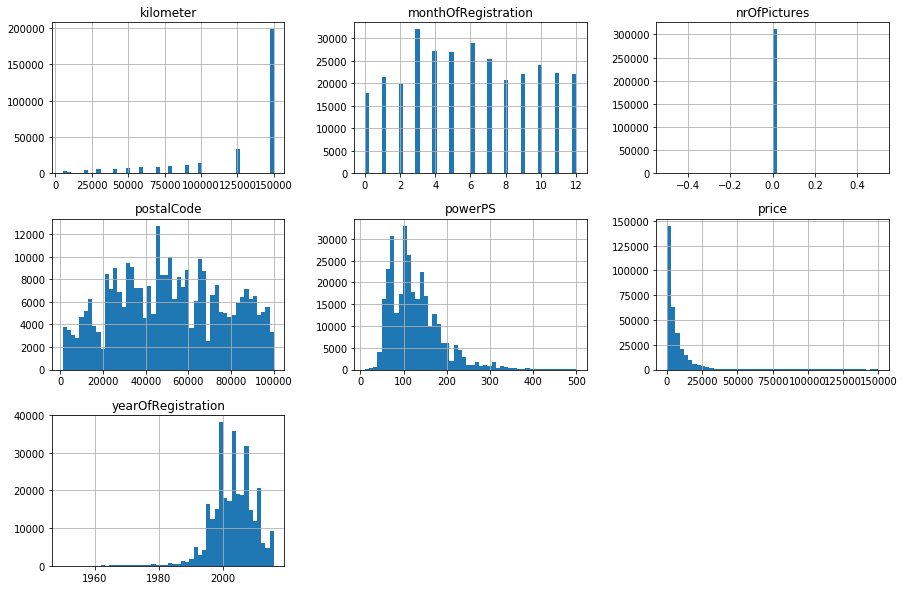

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50,figsize=(15,10))
plt.show

In [4]:
df=df.drop(['name','offerType','seller','nrOfPictures','dateCrawled','dateCreated','lastSeen','postalCode'], 1)

In [30]:
df['PSkilo']=round(df['powerPS']/df['kilometer'],6)

In [6]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,PSkilo
price,1.000000,0.387229,0.573136,-0.445327,0.045288,0.395729
yearOfRegistration,0.387229,1.000000,0.189357,-0.337638,0.045150,0.146574
powerPS,0.573136,0.189357,1.000000,-0.017849,0.040275,0.269200
kilometer,-0.445327,-0.337638,-0.017849,1.000000,-0.017679,-0.523675
monthOfRegistration,0.045288,0.045150,0.040275,-0.017679,1.000000,-0.004175
PSkilo,0.395729,0.146574,0.269200,-0.523675,-0.004175,1.000000


In [29]:
df['PSkilo']

3         0.000500
4         0.000767
5         0.000680
6         0.000727
10        0.000700
11        0.000933
14        0.002714
17        0.000500
18        0.000907
19        0.000680
20        0.001600
21        0.001540
23        0.000333
24        0.000787
25        0.001287
27        0.001650
28        0.010000
29        0.000400
30        0.000753
33        0.010900
34        0.000813
38        0.000860
39        0.000467
43        0.000950
45        0.000600
46        0.001180
47        0.001287
49        0.000727
56        0.010200
57        0.000763
            ...   
371474    0.002125
371477    0.001360
371478    0.000633
371479    0.000673
371480    0.000656
371481    0.001407
371483    0.002267
371487    0.001180
371488    0.000953
371490    0.001248
371491    0.000773
371497    0.000773
371499    0.000360
371500    0.005000
371501    0.001160
371502    0.000833
371503    0.000971
371505    0.000673
371506    0.000700
371508    0.000833
371510    0.000967
371511    0.

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
PSkilo                 0
dtype: int64

In [ ]:
df.info()

In [9]:
df=pd.get_dummies(df)

In [ ]:
df.info()

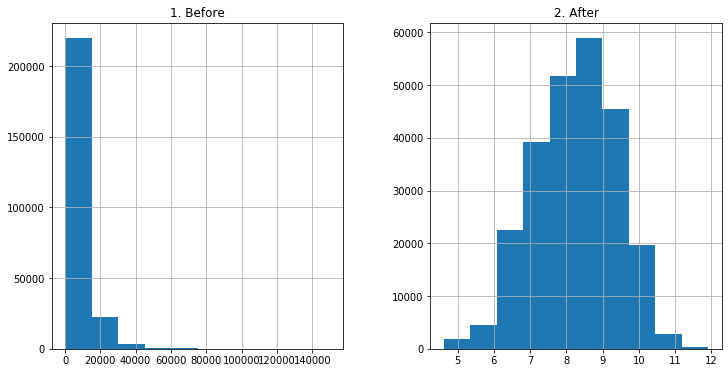

In [10]:
import numpy as np
Y = df['price']
X = df.drop(['price'], axis='columns', inplace=False)

prices = pd.DataFrame({"1. Before":Y, "2. After":np.log1p(Y)})
prices.hist(figsize=(12,6))

    
Y = np.log1p(Y)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(172955, 315) (74124, 315) (172955,) (74124,)


# 교차검증함수
 # --------------------------

In [12]:
from sklearn.metrics import mean_squared_error
def rmse(model,test_x,test_y):
    predict=model.predict(test_x)
    mse=mean_squared_error(test_y,predict)
    rmse=np.sqrt(mse)
    print('MSE:',mse)
    print('RMSE:',rmse)

# 선형회귀
# ---------------------


In [13]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('평균 : ',lin_reg.predict(x_test).mean())

평균 :  8.246403249256396


In [15]:
rmse(lin_reg,x_test,y_test)

MSE: 0.29002955770749594
RMSE: 0.5385439236566465


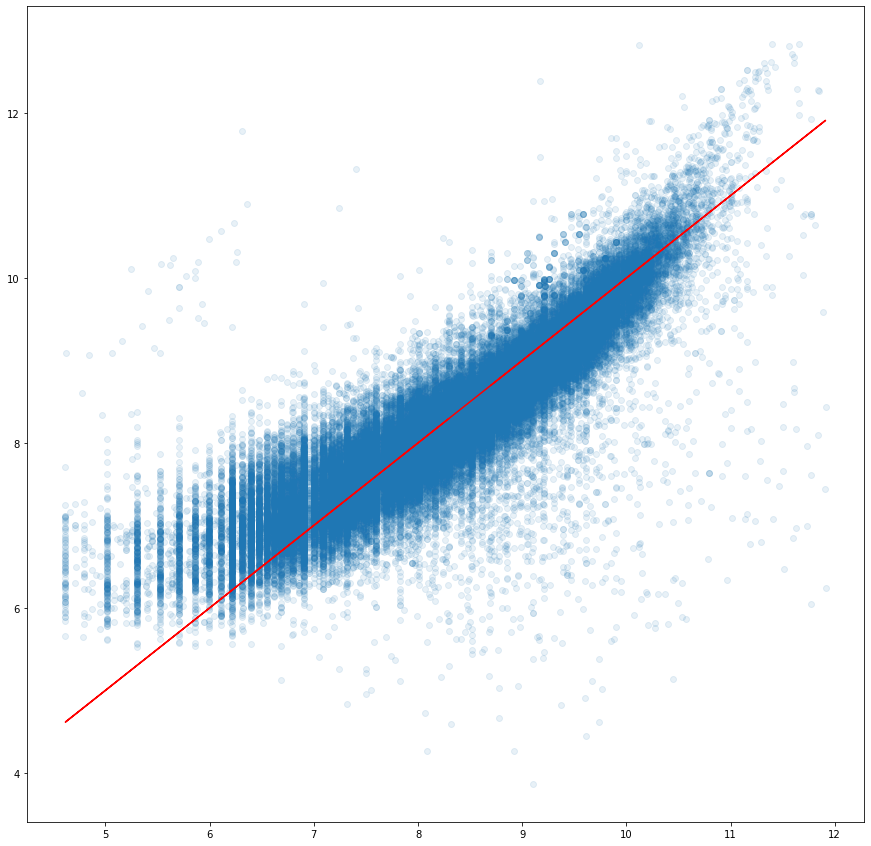

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,lin_reg.predict(x_test),alpha=0.1)
plt.plot(y_test,y_test,c='red')
plt.show()

# 결정트리
# ---------------------

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [22]:
print('평균 : ',tree_reg.predict(x_test).mean())

평균 :  8.246858068627297


In [23]:
rmse(tree_reg,x_test,y_test)

MSE: 0.24657760257729525
RMSE: 0.49656580890884466


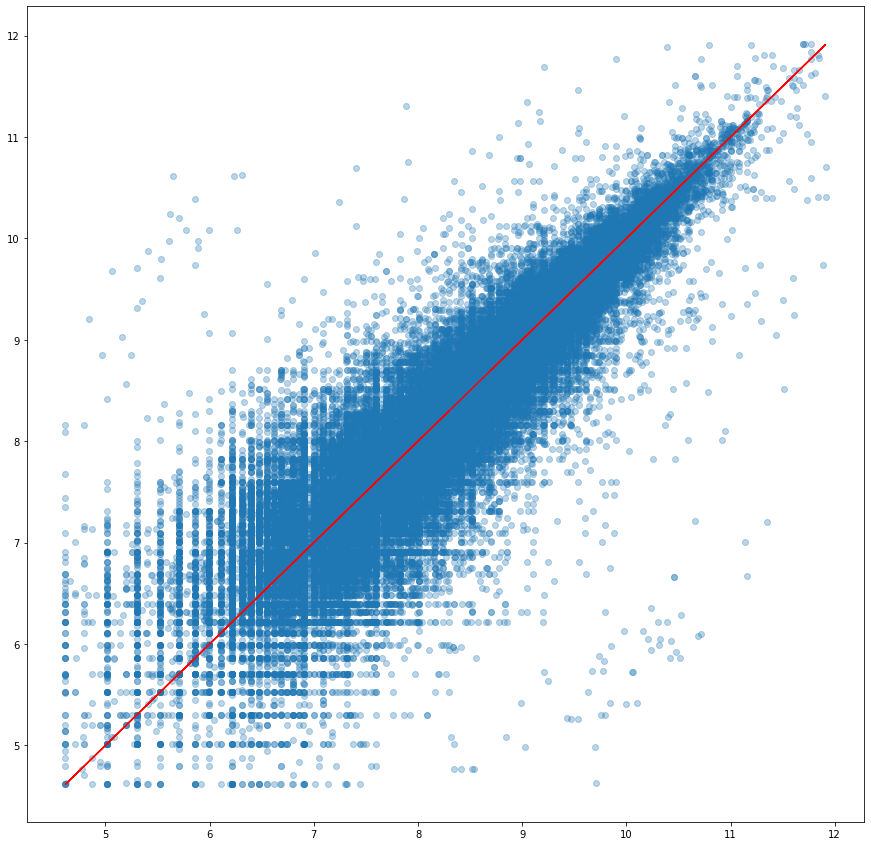

In [24]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,tree_reg.predict(x_test),alpha=0.3)
plt.plot(y_test,y_test,c='red')
plt.show()

# 랜덤포레스트
# -------------------

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [18]:
print('평균값 : ',rfr.predict(x_test).mean())

평균값 :  8.247347720409943


In [19]:
rfr.score(x_test,y_test)

0.873458120924901

In [20]:
rmse(rfr,x_test,y_test)

MSE: 0.16286513254247187
RMSE: 0.40356552447213806


In [1]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,rfr.predict(x_test),alpha=0.3)
plt.plot(y_test,y_test,c='red')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy .stats import randint
from sklearn.ensemble import RandomForestRegressor
param_distribs = {
        'n_estimators' : randint(low=1,high=200),
        'max_features' : randint(low=1,high=8)
}
forest_reg = RandomForestRegressor(random_state=42)
 
rnd_search = RandomizedSearchCV(forest_reg, param_distribs, cv=5,n_iter=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
 
rnd_search.fit(x_train,y_train)

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
     print(np.sqrt(-mean_score), params)

In [ ]:
final_model = rnd_search.best_estimator_
 
final_predictions = final_model.predict(x_test)
 
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)